In [1]:
#only whem ussing colab
! unzip /content/drive/MyDrive/Colab_Notebooks/archive.zip

Archive:  /content/drive/MyDrive/Colab_Notebooks/archive.zip
  inflating: AirPassengers.csv       


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [3]:
df = pd.read_csv('/content/AirPassengers.csv', usecols=[1])
df.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


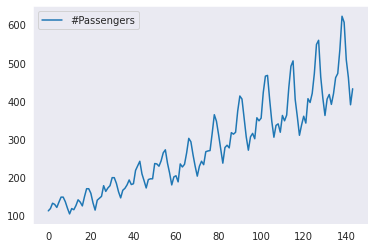

In [4]:
df.plot()

In [5]:
# ML libs
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 

In [6]:
#preprcessing
dataset = df.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
dataset_scaled = scaler.fit_transform(dataset)
print(dataset_scaled[:10])

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]]


In [7]:
#train test split
train_size = int(len(dataset_scaled)*0.66)
dataset_train, dataset_test = dataset_scaled[:train_size], dataset_scaled[train_size:]
print(f'train size: {dataset_train.size}')
print(f'test size: {dataset_test.size}')

train size: 95
test size: 49


In [8]:
#generating sequences
def to_sequence(dataset, seq_size=1):
  x = []
  y = []
  for i in range(len(dataset)-seq_size-1):
    x.append(dataset[i:i+seq_size,0])
    y.append(dataset[i+seq_size])
  return np.array(x), np.array(y)

SEQ_SIZE = 5
train_x, train_y = to_sequence(dataset_train, SEQ_SIZE)
test_x, test_y = to_sequence(dataset_test, SEQ_SIZE)
print(f'Train dataset set size {train_x.shape}')
print(f'Test dataset set size {test_x.shape}')

Train dataset set size (89, 5)
Test dataset set size (43, 5)


In [9]:
#Building models
model = Sequential()
model.add(Dense(64, input_dim=SEQ_SIZE, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, verbose=2)

Epoch 1/100
3/3 - 1s - loss: 0.0100 - acc: 0.0112 - val_loss: 0.0405 - val_acc: 0.0233 - 925ms/epoch - 308ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0064 - acc: 0.0112 - val_loss: 0.0310 - val_acc: 0.0233 - 25ms/epoch - 8ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0053 - acc: 0.0112 - val_loss: 0.0273 - val_acc: 0.0233 - 32ms/epoch - 11ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0054 - acc: 0.0112 - val_loss: 0.0262 - val_acc: 0.0233 - 24ms/epoch - 8ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0052 - acc: 0.0112 - val_loss: 0.0250 - val_acc: 0.0233 - 26ms/epoch - 9ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0048 - acc: 0.0112 - val_loss: 0.0239 - val_acc: 0.0233 - 27ms/epoch - 9ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0044 - acc: 0.0112 - val_loss: 0.0232 - val_acc: 0.0233 - 26ms/epoch - 9ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0041 - acc: 0.0112 - val_loss: 0.0229 - val_acc: 0.0233 - 52ms/epoch - 17ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0040 - acc: 0.0112 - val_loss: 0.0225 - val_acc: 0.0233 - 38ms/epoch - 13ms/

In [11]:

predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

predict_train = scaler.inverse_transform(predict_train)
predict_test = scaler.inverse_transform(predict_test)

train_y_inverse = scaler.inverse_transform([train_y[:,0]])
test_y_inverse = scaler.inverse_transform([test_y[:,0]])


train_score = np.sqrt(mean_squared_error(train_y_inverse[0], predict_train[:,0]))
test_score = np.sqrt(mean_squared_error(test_y_inverse[0], predict_test[:,0]))

print(f'Train RMSE {train_score}')
print(f'Test RMSE {test_score}')

Train RMSE 20.94365119649366
Test RMSE 44.521293422373105


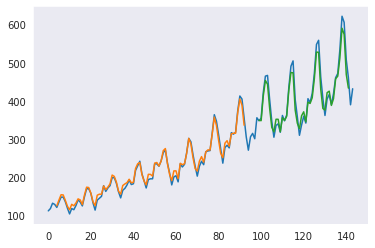

In [25]:
train_prediction_plot = np.empty_like(dataset)
train_prediction_plot[:,:] = np.nan
train_prediction_plot[SEQ_SIZE-1:len(predict_train)+SEQ_SIZE-1, :] = predict_train


test_prediction_plot = np.empty_like(dataset)
test_prediction_plot[:,:] = np.nan
test_prediction_plot[len(dataset_train)+(SEQ_SIZE)-1:len(dataset)-2, :] = predict_test
# testPredictPlot[len(train)+(length)-1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset_scaled))
plt.plot(train_prediction_plot)
plt.plot(test_prediction_plot)